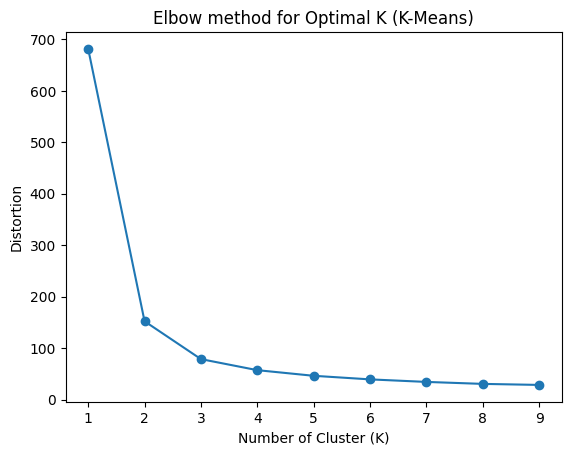

Silhouette Score fot K-Means 0.6846852494290198


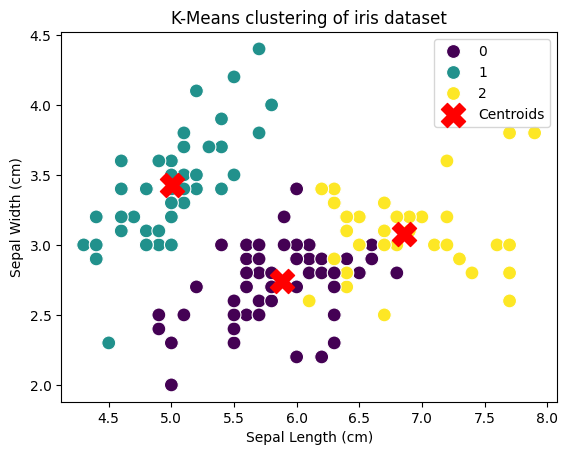

In [6]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load data iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)

# menggunakan elbow untuk rekomendasi K terbaik
distortions = []
K_range = range(1,10)

for k in K_range:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)

# plotting elbow method
plt.plot(K_range, distortions, marker = 'o')
plt.title("Elbow method for Optimal K (K-Means)")
plt.xlabel("Number of Cluster (K)")
plt.ylabel("Distortion")
plt.show()


# implementasi kmeans dan evaluasi silhouette
from sklearn.metrics import silhouette_score

# menentukan nilai K yang optimal
optimal_k = 3

# melakukan K-Means dengan K optimal
kmeans = KMeans(n_clusters = optimal_k)
df['cluster'] = kmeans.fit_predict(df)

# menghitung silhouette Score
silhouette_avg = silhouette_score(df, df['cluster'])
print(f'Silhouette Score fot K-Means {silhouette_avg}')


# visualisasi hasil pengelompokan dengan scatterplot
# visualisasi pengelompokan menggunakan scatter plot
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', hue = 'cluster', data = df, palette = 'viridis', s = 100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'red', marker = 'X', label = 'Centroids')
plt.title('K-Means clustering of iris dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()



